# **Open Circuit Potential (OCP) Balancing**

This notebook is created to provide an example of using PyBaMM-param package when balancing OCP curve with shifting and stretching the fitted curve to experimental data. This can also be found in `scripts/ocp_balance.py` as Python function.

In [1]:
#%pip install git+https://github.com/paramm-team/pybamm-param.git -q
import pbparam
import pandas as pd
import os

os.chdir(os.path.join(pbparam.__path__[0], "input", "data"))

We have 4 different files in this example. 2 for half-cell and 2 for three-electrode full cell. They are divided for their lithiation and delithiation stage.

In [2]:
#  .csv files are uploaded
anode_half_lit = pd.read_csv(os.path.join("anode_OCP_2_lit.csv"))
anode_half_delit = pd.read_csv(os.path.join("anode_OCP_2_delit.csv"))
anode_three_lit = pd.read_csv(os.path.join("anode_OCP_3_lit.csv"))
anode_three_delit = pd.read_csv(os.path.join("anode_OCP_3_delit.csv"))

In [ ]:
anode_three_delit['Capacity [A.h]'] = anode_three_delit['Capacity [A.h]'] /5 #anode_three_delit['Capacity [A.h]'].abs().max() 

In [ ]:
anode_three_lit['Capacity [A.h]'] = anode_three_lit['Capacity [A.h]'] / 5 #anode_three_lit['Capacity [A.h]'].abs().max() 

In [ ]:
#  .csv files are uploaded
cathode_half_lit = pd.read_csv(os.path.join("cathode_OCP_2_lit.csv"))
cathode_half_delit = pd.read_csv(os.path.join("cathode_OCP_2_delit.csv"))
cathode_three_lit = pd.read_csv(os.path.join("cathode_OCP_3_lit.csv"))
cathode_three_delit = pd.read_csv(os.path.join("cathode_OCP_3_delit.csv"))

Then, optimisation problem should be passed to pbparam with the data to be used as below. Cost function (default=pbparam.RMSE()) and weights (default=[1,1]) are optional arguments. Weights can be defined as single value list or same lengt with data.

In [3]:
ocp_balance = pbparam.OCPBalance(
    [anode_half_lit, anode_half_delit],
    [anode_three_lit, anode_three_delit],
    
    #cost_function=pbparam.MLE(),
    #weights=[2],
)

[     Capacity [A.h]  Voltage [V]
0          0.000466     1.333774
1          0.004464     0.804794
2          0.008462     0.668792
3          0.012460     0.583692
4          0.016458     0.531663
..              ...          ...
246        0.984007     0.072561
247        0.988006     0.070136
248        0.992004     0.069315
249        0.996002     0.069220
250        1.000000     0.064561

[251 rows x 2 columns],      Capacity [A.h]  Voltage [V]
0             1.000     0.064561
1             0.996     0.073764
2             0.992     0.079301
3             0.988     0.081669
4             0.984     0.084208
..              ...          ...
246           0.016     1.079984
247           0.012     1.125675
248           0.008     1.171002
249           0.004     1.248312
250           0.000     1.406902

[251 rows x 2 columns]]
     Capacity [A.h]  Voltage [V]
0          0.000466     1.333774
1          0.004464     0.804794
2          0.008462     0.668792
3          0.012460     0

In [4]:
ocp_balance.x0

[-0.0, 1.0]

In [ ]:
ocp_balance = pbparam.OCPBalance(
    #[anode_half_lit], 
    [anode_half_delit],
    #[anode_three_lit], 
    [anode_three_delit],
    
    #cost_function=pbparam.MLE(),
    #weights=[2],
)

Optimiser to minimise cost function should be selected in the nest step as below.

In [5]:
optimiser = pbparam.ScipyMinimize(method="Nelder-Mead")

In [ ]:
ocp_balance.x0 = [0,0.2]

```optimiser.optimise(optimisation_problem)``` should be used to run minimasiation algorithm.

In [6]:
result = optimiser.optimise(ocp_balance)

shift and stretch values and final cost function value can be printed as below.

In [7]:
print(result)


             Optimal values: [0.30562706 1.1       ]
        Cost function value: 1.7564534069210822
                 Solve time: 82.072 ms
                    Message: Optimization terminated successfully.
        


PyBaMM-param has built in plot function to represent results.

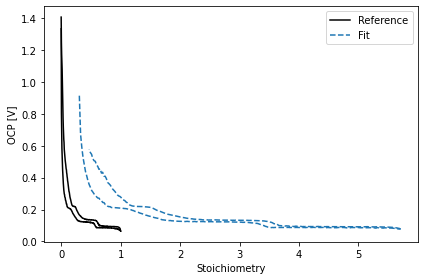

In [8]:
result.plot();

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(anode_three_delit['Capacity [A.h]'],anode_three_delit['Voltage [V]'])

In [ ]:
anode_three_delit